In [33]:
import pandas as pd
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import Dataset, KNNBasic, BaselineOnly, Reader, SVD
from surprise.model_selection import cross_validate
import os
### surprise package is library for recommender systems
### Dataset and Reader are to load data in Surprise format
### SVD is the Singular Value Decomposition algorithm for collaborative filtering

In [2]:
data = pd.read_csv("ratings.csv")


In [3]:
data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
data = pd.read_csv("ratings.csv")
reader = Reader(rating_scale = (1,5))
dataset = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

model = SVD()
cross_validate(model, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8726  0.8709  0.8788  0.8761  0.8720  0.8741  0.0029  
MAE (testset)     0.6690  0.6700  0.6756  0.6722  0.6708  0.6715  0.0023  
Fit time          0.80    0.80    0.77    0.75    0.79    0.78    0.02    
Test time         0.10    0.09    0.08    0.15    0.08    0.10    0.03    


{'test_rmse': array([0.87264397, 0.87092389, 0.87879677, 0.87611462, 0.87203297]),
 'test_mae': array([0.66897912, 0.66997128, 0.67559116, 0.67216972, 0.67082972]),
 'fit_time': (0.7967081069946289,
  0.7960209846496582,
  0.7696781158447266,
  0.7521657943725586,
  0.7910878658294678),
 'test_time': (0.09509396553039551,
  0.0860288143157959,
  0.07999610900878906,
  0.14941883087158203,
  0.07919621467590332)}

In [5]:
print("Number of factors (latent features):", model.n_factors)

print("Learning rate:", model.lr_all if hasattr(model, 'lr_all') else model.__dict__.get('lr_all', 'Not set'))
print("Regularization:", model.reg_all if hasattr(model, 'reg_all') else model.__dict__.get('reg_all', 'Not set'))

print(model.__dict__)


Number of factors (latent features): 100
Learning rate: Not set
Regularization: Not set
{'n_factors': 100, 'n_epochs': 20, 'biased': True, 'init_mean': 0, 'init_std_dev': 0.1, 'lr_bu': 0.005, 'lr_bi': 0.005, 'lr_pu': 0.005, 'lr_qi': 0.005, 'reg_bu': 0.02, 'reg_bi': 0.02, 'reg_pu': 0.02, 'reg_qi': 0.02, 'random_state': None, 'verbose': False, 'bsl_options': {}, 'sim_options': {'user_based': True}, 'trainset': <surprise.trainset.Trainset object at 0x110835970>, 'bu': array([-1.14522741e-01, -2.05465379e-01, -2.72763944e-01, -1.95182853e-01,
       -2.83550359e-01,  8.66864498e-02, -1.31950907e-01,  1.17994943e-01,
       -8.11160904e-02, -1.89427726e-01,  3.36465080e-01,  4.66192420e-01,
       -5.23089568e-01, -6.25175387e-01,  3.53004148e-01,  2.18512079e-01,
        1.84233930e-01,  8.01150985e-02,  6.91192678e-01, -4.99663864e-01,
        4.38417306e-02, -9.18068062e-01, -3.34223410e-01,  8.04513432e-02,
       -8.25185056e-02, -3.14099397e-01, -1.87734862e-01, -5.97780781e-01,
     

In [6]:
print("User biases:", model.bu)       # user bias vector
print("Item biases:", model.bi)       # item bias vector
print("User factors matrix shape:", model.pu.shape)
print("Item factors matrix shape:", model.qi.shape)


User biases: [-1.14522741e-01 -2.05465379e-01 -2.72763944e-01 -1.95182853e-01
 -2.83550359e-01  8.66864498e-02 -1.31950907e-01  1.17994943e-01
 -8.11160904e-02 -1.89427726e-01  3.36465080e-01  4.66192420e-01
 -5.23089568e-01 -6.25175387e-01  3.53004148e-01  2.18512079e-01
  1.84233930e-01  8.01150985e-02  6.91192678e-01 -4.99663864e-01
  4.38417306e-02 -9.18068062e-01 -3.34223410e-01  8.04513432e-02
 -8.25185056e-02 -3.14099397e-01 -1.87734862e-01 -5.97780781e-01
 -3.26645255e-02  4.25122302e-01  2.86509011e-01  5.41901035e-01
  1.46473990e-01 -4.18333094e-01 -1.66900555e-01  2.59192715e-01
 -1.92310099e-01  8.92878854e-02  1.51982286e-01  3.11480548e-01
 -4.26443856e-01  6.47757018e-01 -2.69833138e-01 -6.05707349e-01
 -2.26145942e-01 -2.84251124e-01  5.55758798e-01  6.48046019e-01
  4.36589686e-03 -6.83717720e-01 -1.00595084e-02 -6.57660306e-01
 -6.88938754e-02  2.47845895e-01 -8.11576710e-01 -3.53750989e-02
  2.67224433e-01  4.02472838e-01  2.22703144e-01 -2.55137021e-01
 -3.19092790

In [7]:
user_id = '1'
item_id = '50'

pred = model.predict(user_id, item_id)
print(pred)


user: 1          item: 50         r_ui = None   est = 3.50   {'was_impossible': False}


In [8]:
trainset, testset = train_test_split(dataset, test_size=0.2)

model.fit(trainset)
predictions = model.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.8749
MAE:  0.6717


0.6716748978232238

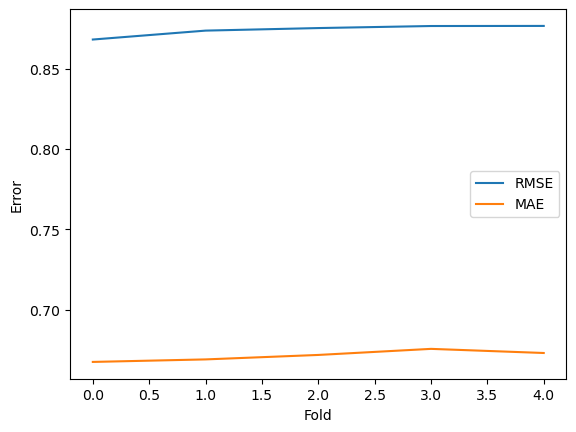

In [9]:
import matplotlib.pyplot as plt

results = cross_validate(model, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=False)
rmse_scores = results['test_rmse']
mae_scores = results['test_mae']


plt.plot(rmse_scores, label='RMSE')
plt.plot(mae_scores, label='MAE')
plt.xlabel('Fold')
plt.ylabel('Error')
plt.legend()
plt.show()


In [10]:
data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [12]:
dataMovie = Dataset.load_builtin("ml-100k")

In [13]:
algo = SVD()

In [18]:
cross_validate(algo, dataMovie, measures=["RMSE", "MAE"], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9375  0.9313  0.9404  0.9383  0.9324  0.9360  0.0035  
MAE (testset)     0.7405  0.7349  0.7383  0.7372  0.7350  0.7372  0.0021  
Fit time          0.68    0.79    0.66    0.59    0.60    0.67    0.07    
Test time         0.09    0.21    0.07    0.08    0.07    0.11    0.05    


{'test_rmse': array([0.93746935, 0.9312611 , 0.94036652, 0.93828987, 0.93237079]),
 'test_mae': array([0.7405315 , 0.73487187, 0.73826689, 0.73722181, 0.73498314]),
 'fit_time': (0.6820521354675293,
  0.7939722537994385,
  0.6638097763061523,
  0.592083215713501,
  0.6011209487915039),
 'test_time': (0.08739686012268066,
  0.2131822109222412,
  0.07470107078552246,
  0.0816659927368164,
  0.07386374473571777)}

In [28]:
trainset, testset = train_test_split(dataMovie, test_size=0.3)
algo.fit(trainset)
predictions=algo.test(testset)
accuracy.rmse(predictions)

#### We can also train and test an algorithm using this one line code
#### predictions = algo.fit(trainset).test(testset)

RMSE: 0.9354


0.9354397897351868

In [31]:
#Training on whole trainset and the predict() method
trainset = dataMovie.build_full_trainset()
algo = KNNBasic()
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [32]:
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid, r_ui=4, verbose = True)

user: 196        item: 302        r_ui = 4.00   est = 4.06   {'actual_k': 40, 'was_impossible': False}


In [34]:
# Using custom dataset

file_path = os.path.expanduser("~/.surprise_data/ml-100k/ml-100k/u.data")

reader = Reader(line_format="user item rating timestamp", sep="\t")

dataMovie = Dataset.load_from_file(file_path, reader=reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(BaselineOnly(), dataMovie, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9431  0.9399  0.9509  0.9433  0.9441  0.9443  0.0036  
MAE (testset)     0.7475  0.7497  0.7525  0.7465  0.7474  0.7487  0.0022  
Fit time          0.12    0.20    0.17    0.16    0.18    0.17    0.03    
Test time         0.22    0.07    0.06    0.06    0.20    0.12    0.07    


{'test_rmse': array([0.94310467, 0.93987317, 0.95086236, 0.94328068, 0.94413533]),
 'test_mae': array([0.74748419, 0.74968582, 0.75254155, 0.74646346, 0.74735022]),
 'fit_time': (0.11932206153869629,
  0.1980741024017334,
  0.17023992538452148,
  0.1642770767211914,
  0.1758861541748047),
 'test_time': (0.2178974151611328,
  0.06524801254272461,
  0.06157064437866211,
  0.06069803237915039,
  0.1966409683227539)}